# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

base_dir = "/Users/mzielinski" #"/home/carnd"
input_dir = base_dir +  "/datasets/traffic-signs-data/"
training_file = input_dir + "train.p"
testing_file = input_dir + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
#X_train.shape[0]
n_train = 39209

# TODO: Number of testing examples.
#X_test.shape[0]
n_test = 12630

# TODO: What's the shape of an traffic sign image?
#X_test.shape[1:4]
image_shape = (32, 32, 3)

# TODO: How many unique classes/labels there are in the dataset.
#len(np.unique(y_train))
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from numpy.random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
def display_images_and_labels(images, labels):
    unique_classes = np.unique(labels)
    indices_per_class = [np.where(labels == cls) for cls in unique_classes]
    X_for_class = [images[tuple(indices_per_class[cls])] for cls in unique_classes]

    plots_per_class = 9
    grid_dim = (len(unique_classes), plots_per_class)
    fig = plt.figure(figsize=(32, 160))

    for cls in unique_classes:
        X_cls = X_for_class[cls]
        num_examples = X_cls.shape[0]
        random_indices = randint(0, num_examples, plots_per_class)
        for i in range(plots_per_class):
            plt.subplot2grid(grid_dim, (cls,i))
            if i==0:
                title = "Class " + str(cls) + " has " + str(num_examples) + " examples" + "\n"
                plt.title(title)
            plt.imshow(X_cls[random_indices[i]], interpolation='none', aspect='auto')
            ax = fig.gca()
            ax.set_axis_off()
    plt.show()

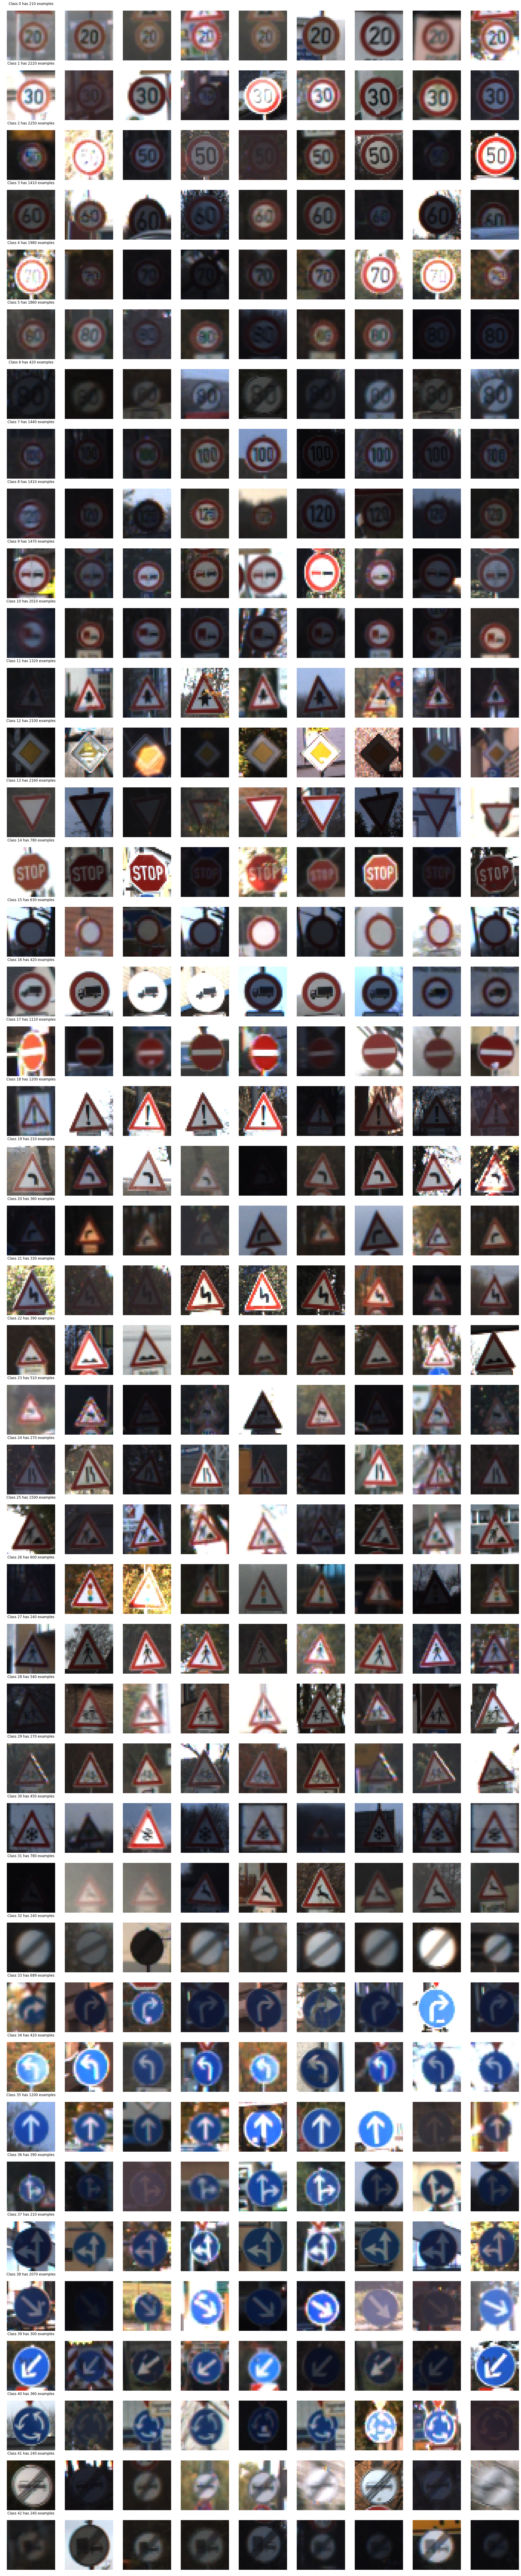

In [144]:
display_images_and_labels(X_train, y_train)

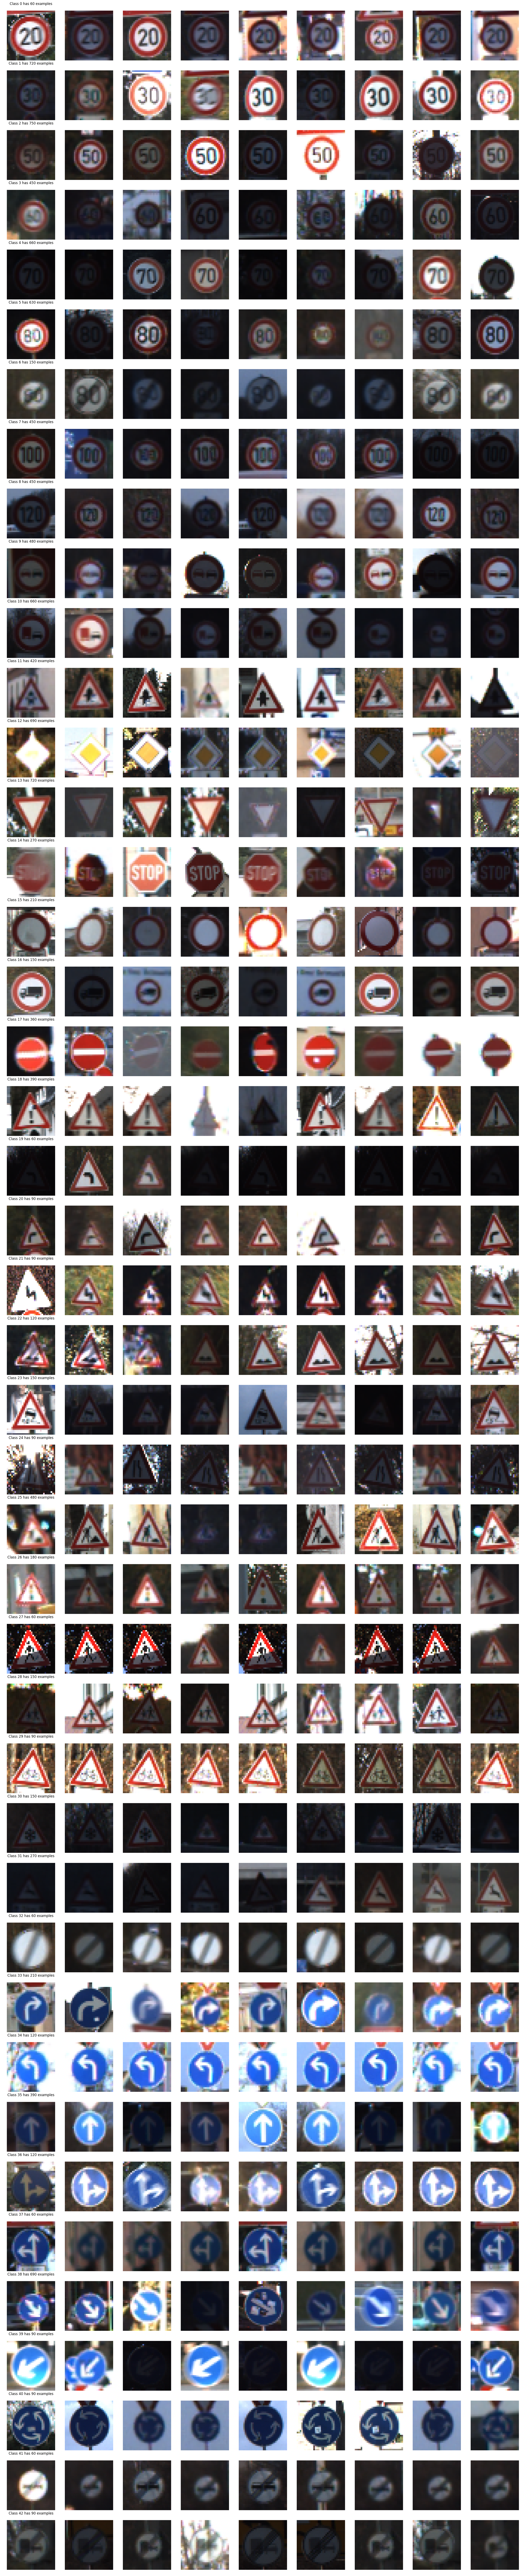

In [145]:
display_images_and_labels(X_test, y_test)

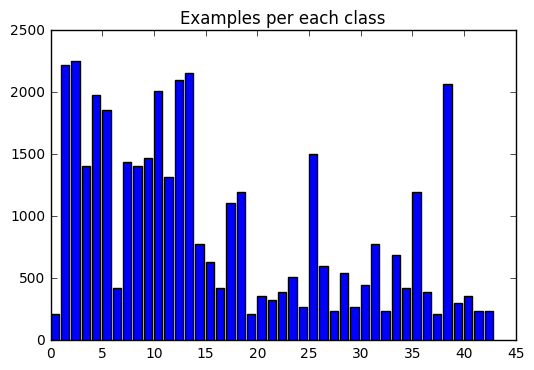

In [9]:
from matplotlib.pyplot import bar
unique_classes = np.unique(y_train)
indices_per_class = [np.where(y_train == cls) for cls in unique_classes]
X_for_class = [X_train[tuple(indices_per_class[cls])] for cls in unique_classes]
Y_for_class = [y_train[tuple(indices_per_class[cls])] for cls in unique_classes]
cls_lengths = [Y_for_class[cls].shape[0] for cls in unique_classes]
bar(unique_classes, cls_lengths)
plt.title('Examples per each class')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
# Preprocess the data here.
# Feel free to use as many code cells as needed.

In [10]:
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

In [11]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)


In [13]:
train_features = normalize(X_train)
test_features = normalize(X_test)

In [14]:
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=832289)

In [15]:
print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)

(37248, 32, 32, 3)
(1961, 32, 32, 3)
(12630, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I have performed following steps

- Normalization of image values to [0;1], to make each variable on the standardized scale, which is good practice in NN model building. 
- Encoding of labels, since I want to treat it as classification problem. This will allow me to produce probability per label, with each label being independent. Without encoding this would be treated as regression.

I have not performed other preprocessing steps as I want the network to learn the features without manual intervention. In particular I left the RGB (no YUV, no grayscale) as I compared to grayscale and got better results with RGB. You can also do 1x1 convolution to learn the correct 1-dimensional "channel".

I have also considered following steps:

- random jitters, zooming and rotation to augment the dataset with additional examples (and smooth the uneven number of classes)
- occlusion (since I noticed that some training set examples are occluded)

However upon seeing that network get very good results and generalizes well I decided against it.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I performed train/validation split with stratified sampling, leaving 5% as validation.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I based my architecture on LeNet, but extended it a little based on my experiments. Final structure looks as follows:

- Convolutional layer with depth 6 and kernel [5,5]
- Maxpooling layer with pooling size [2,2]
- Convolutional layer with depth 16 and kernel [5,5]
- Maxpooling layer with pooling size [2,2]
- Dropout layer with probability 0.5
- Fully connected layer with 128 neurons
- Fully connected layer with 64 neurons
- Output fully connected layer with 43 neurons and softmax activation

For all layers but the last I've used:
- batch normalization
- L1 regularization of weights
- ReLU activation
- Xavier initializer

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [61]:
# Parameters
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

#try running the code for longer epoch say 1000 or 10000 to see if it improves.  



BATCH_SIZE = 64
EPOCHS = 10

In [62]:
def nn_model(x):
    
    normalizer_fn = None
    normalizer_fn = tf.contrib.layers.batch_norm
    
    regularizer = None
    regularizer = tf.contrib.layers.l1_regularizer(0.01)
    
    conv_initializer = tf.contrib.layers.xavier_initializer_conv2d()

    conv2d_1 = tf.contrib.layers.convolution2d(
        x,
        num_outputs=6, 
        kernel_size=(5,5),
        activation_fn=tf.nn.relu,
        weights_initializer=conv_initializer,
        stride=(1, 1),
        normalizer_fn = tf.contrib.layers.batch_norm,
        weights_regularizer = regularizer,
        trainable=True)
    pool_1 = tf.nn.max_pool(conv2d_1,
        ksize=[1, 2, 2, 1],
        strides=[1, 1, 1, 1],
        padding='SAME')
    
    conv2d_2 = tf.contrib.layers.convolution2d(
        pool_1,
        num_outputs=16,
        kernel_size=(5,5),
        activation_fn=tf.nn.relu,
        weights_initializer=conv_initializer,
        stride=(1, 1),
        normalizer_fn = tf.contrib.layers.batch_norm,
        weights_regularizer = regularizer,        
        trainable=True)
    pool_2 = tf.nn.max_pool(conv2d_2,
        ksize=[1, 2, 2, 1],
        strides=[1, 1, 1, 1],
        padding='SAME') 
    
    flattened = flatten(pool_2)
    flattened = tf.nn.dropout(flattened, 0.5)
        
    fc_1 = tf.contrib.layers.fully_connected(
        flattened,
        num_outputs=128,     # The number of filters to generate
        activation_fn=tf.nn.relu,
        weights_initializer=tf.contrib.layers.xavier_initializer(),
        normalizer_fn = tf.contrib.layers.batch_norm,
        weights_regularizer = regularizer,
        trainable=True)

    fc_2 = tf.contrib.layers.fully_connected(
        fc_1,
        num_outputs=64,     # The number of filters to generate
        activation_fn=tf.nn.relu,
        weights_initializer=tf.contrib.layers.xavier_initializer(),
        normalizer_fn = tf.contrib.layers.batch_norm,
        weights_regularizer = regularizer,
        trainable=True)
    
    out = tf.contrib.layers.fully_connected(
        fc_2,
        num_outputs=43,     # The number of filters to generate
        activation_fn=tf.nn.softmax,
        weights_initializer=tf.contrib.layers.xavier_initializer(),
        trainable=True)

    
    return out

In [63]:
# Optimizer
features = tf.placeholder(tf.float32, (None, 32, 32, 3))
labels = tf.placeholder(tf.float32, (None, n_classes))
model_output = nn_model(features)

# Create predictions from network output
prediction = tf.clip_by_value(model_output,1e-10,1.0)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))

# Determine indices of incorrect predictions
is_not_correct_prediction = tf.logical_not(is_correct_prediction)
incorrect_indices = tf.where(is_not_correct_prediction)
incorrect_predictions = tf.boolean_mask(tf.argmax(prediction, 1), is_not_correct_prediction)

# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Gradient Descent
optimizer = tf.train.AdamOptimizer().minimize(loss) 

# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: test_features, labels: test_labels}

In [64]:
def eval_data(input_dict, batch_size, tf_session):
    input_features = input_dict[features]
    input_labels= input_dict[labels]
    
    steps_per_epoch = int(math.ceil(input_features.shape[0]/batch_size))
    num_examples = steps_per_epoch * batch_size
    total_acc = 0
    incorrect_indices_list = []
    incorrect_predictions_list = []
    
    for batch_i in range(steps_per_epoch):
        batch_start = batch_i*BATCH_SIZE
        batch_features = input_features[batch_start:(batch_start + batch_size)]
        batch_labels = input_labels[batch_start:(batch_start + batch_size)]
        batch_dict = {features: batch_features, labels: batch_labels}
        batch_accuracy, indices_within_batch, preds_within_batch = \
            tf_session.run([accuracy, incorrect_indices, incorrect_predictions], feed_dict=batch_dict)
        total_acc += (batch_accuracy * batch_features.shape[0])
        indices_outside_batch = [batch_start + ind for ind in list(indices_within_batch.reshape(-1))]
        incorrect_indices_list += indices_outside_batch
        incorrect_predictions_list += list(preds_within_batch.reshape(-1))
        
    return total_acc/num_examples, incorrect_indices_list, incorrect_predictions_list

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch 10/10: 100%|██████████| 582/582 [00:57<00:00, 10.20batches/s]


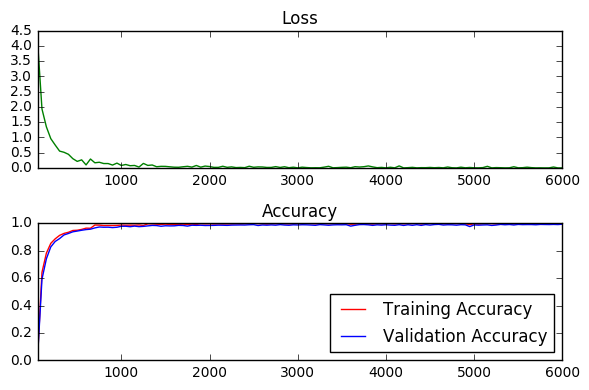

Training accuracy at 0.9986011402027027
Validation accuracy at 0.99267578125
Test accuracy at 0.9521484375


In [65]:
from sklearn.utils import shuffle

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Start session
session = tf.Session()

#Run model
session.run(init)
batch_count = int(math.ceil(len(train_features)/BATCH_SIZE))

for epoch_i in range(EPOCHS):
    
    shuffled_features, shuffled_labels = shuffle(train_feed_dict[features], train_feed_dict[labels])

    # Progress bar
    batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, EPOCHS), unit='batches')

    # The training cycle
    for batch_i in batches_pbar:
        # Get a batch of training features and labels
        batch_start = batch_i*BATCH_SIZE
        batch_features = shuffled_features[batch_start:(batch_start + BATCH_SIZE)]
        batch_labels = shuffled_labels[batch_start:(batch_start + BATCH_SIZE)]

        # Run optimizer and get loss
        _, l = session.run(
            [optimizer, loss],
            feed_dict={features: batch_features, labels: batch_labels})

        # Log every 50 batches
        if not batch_i % log_batch_step:
            # Calculate Training and Validation accuracy
            training_accuracy, _, _ = eval_data(train_feed_dict, batch_size = 1024, tf_session = session)
            validation_accuracy, _, _ = eval_data(valid_feed_dict, batch_size = 1024, tf_session = session)

            # Log batches
            previous_batch = batches[-1] if batches else 0
            batches.append(log_batch_step + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            valid_acc_batch.append(validation_accuracy)

# Check accuracy against test data
test_accuracy, incorrect_test_indices, incorrect_test_predictions = \
    eval_data(test_feed_dict, batch_size = 1024, tf_session = session)

# Plot results
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Training accuracy at {}'.format(training_accuracy))
print('Validation accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))

In [66]:
# Training accuracy at 0.9986011402027027
# Validation accuracy at 0.99267578125
# Test accuracy at 0.9521484375

In [87]:
from numpy.random import randint
def plot_predictions(images, labels, predictions, sample_size = 10):
    if sample_size is not None:
        sample_indices = randint(0, high=len(labels) - 1, size=sample_size)
    else:
        sample_indices = range(len(labels))
    fig = plt.figure(figsize=(10, 10))
    for i, idx in enumerate(sample_indices):
        truth = labels[idx]
        pred = predictions[idx]
        plt.subplot(5, 2,i+1)
        plt.axis('off')
        color='green' if truth == pred else 'red'
        plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, pred), 
                 fontsize=12, color=color)
        plt.imshow(images[idx])

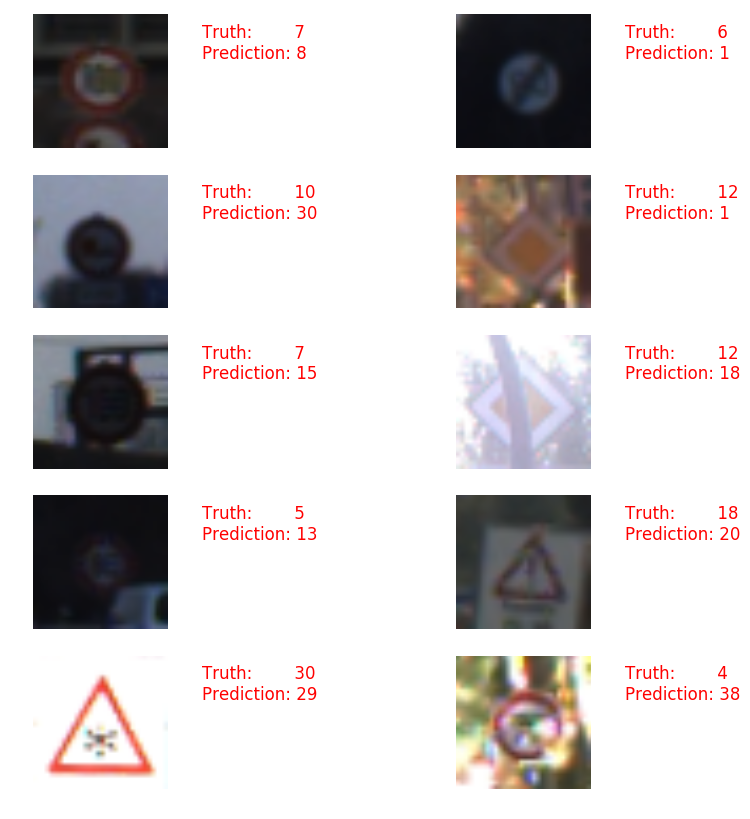

In [68]:
labels_for_incorrect = y_test[incorrect_test_indices]
images_for_incorret = X_test[incorrect_test_indices]
plot_predictions(images_for_incorret, labels_for_incorrect, incorrect_test_predictions)

In [ ]:
# Close the session. This will destroy the trained model.
session.close()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I've experimented with few optimizers (SGD, RMSProp, Adam) and chose Adam for the final model. I used more epochs (30, 100), but seeing that performance plateaus (see the graph) I decided to stay with 10 (so that the network doesn't overfit as well).

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with logistic regression (1 layer) and shallow NN (2 layers) as a baseline to get an idea of the performance. They can get up to 90-93% on training/validation and 75-85% on test.

Next I used LeNet and looking at the performance started to optimize it. I used some state of the art methods like:

- batch normalization to stabilize the network values
- dropout to prevent overfitting and codependence
- L1 to prevent overfitting and make it sparser
- ReLU to make the model more linear and thus easier to train

Those advancements were mostly iterative. I tried different optimizers and Adam seemed the easiest (SGD needed a lot of tweaking to get good results, and after each change I had to tweak again).

I chose number of epochs by running 100 epochs and looking at the graphs of error over time.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [129]:
import skimage.data
import skimage.transform
import os

img_5_path = base_dir + "/img5/"
images = []
for img in os.listdir(img_5_path):
    images.append(skimage.data.imread(img_5_path + img))

images_resized = [skimage.transform.resize(img, (32, 32))[:,:,0:3] for img in images]           

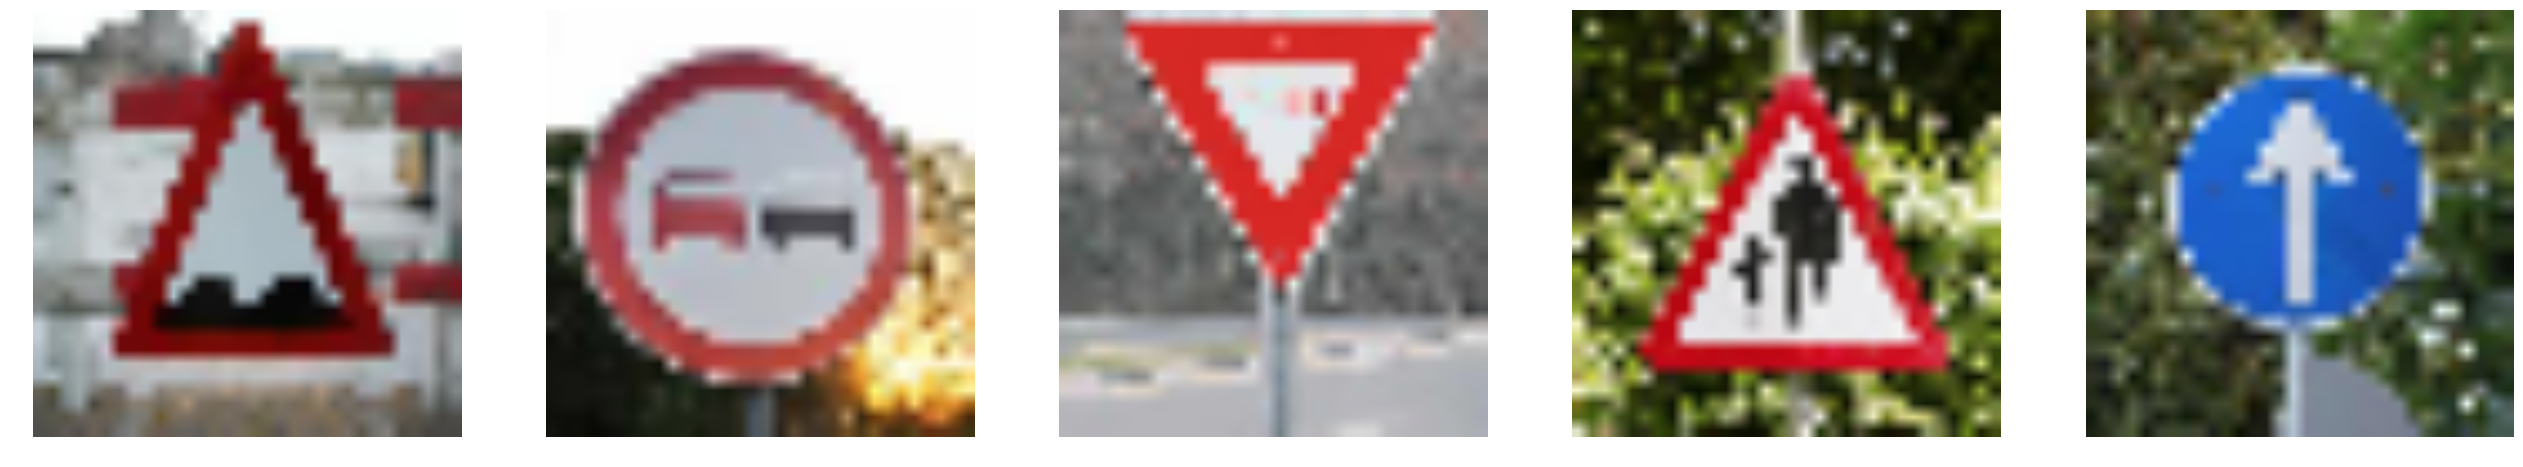

In [130]:
plt.figure(figsize=(32, 32))
for i, img in enumerate(images_resized):
    # Pick the first image for each label.
    plt.subplot(1, 5, i+1)  # A grid of 8 rows x 8 columns
    plt.axis('off')
    _ = plt.imshow(img)
plt.show()

# 22 Bumpy road
# 9 No passing
# 13 Yield
# 28 Children crossing
# 35 Ahead only

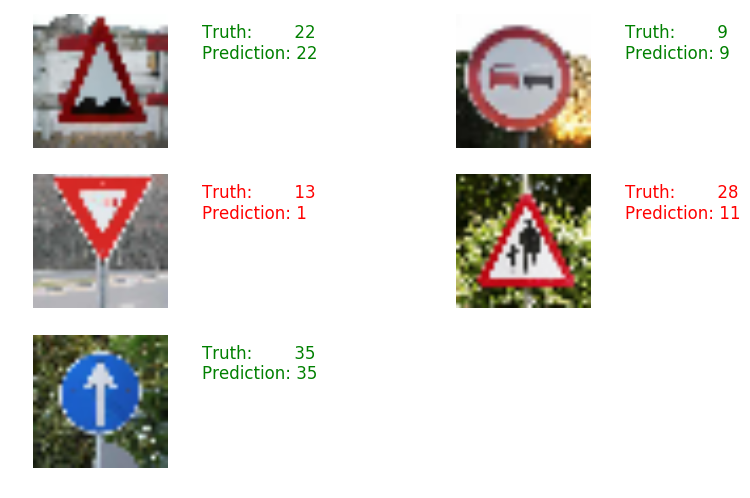

In [153]:
img5_labels = [22, 9, 13, 28, 35]
img5_encoded_labels = encoder.transform(img5_labels)
img5_predictions, top_3 = session.run([tf.argmax(prediction, 1), tf.nn.top_k(prediction, 3)], feed_dict = {features: images_resized, labels: img5_encoded_labels})

plot_predictions(images_resized, img5_labels, img5_predictions, sample_size = None)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

60% (3 out of 5) were classified correctly (see above ^^). Incorrect:

- Children crossing (upon resizing the child is barely noticeable in the image, different image in training set)
- Yield (seems much slimmer in the traning set)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

- Training accuracy at 0.9986011402027027
- Validation accuracy at 0.99267578125
- Test accuracy at 0.9521484375
- 5 images accuracy at 0.60 (3 out of 5)

Sample size is very small (5 images), so it's hard to draw any statistically significant results. However for the misclassified examples it's easy to see why they could present a problem:

- Children crossing image is very different in training/test sets and this image.
- Yield image has very thick red lines in the new set, in comparison to slim borders in training/test sets.

I would naturally expect it to be worse, since the images can be from any country and not reasonably covered in the training set. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [155]:
top_3, img5_labels

(TopKV2(values=array([[  7.84819186e-01,   5.93413971e-02,   4.94902767e-02],
       [  9.99798477e-01,   1.38174291e-04,   1.11019963e-05],
       [  5.87880313e-01,   1.49048433e-01,   1.34439498e-01],
       [  4.35943693e-01,   2.34667256e-01,   1.78681016e-01],
       [  7.14264691e-01,   2.32785389e-01,   1.65706873e-02]], dtype=float32), indices=array([[22, 29, 25],
       [ 9, 10,  2],
       [ 1,  6, 12],
       [11,  1, 28],
       [35,  8,  5]], dtype=int32)),
 [22, 9, 13, 28, 35])

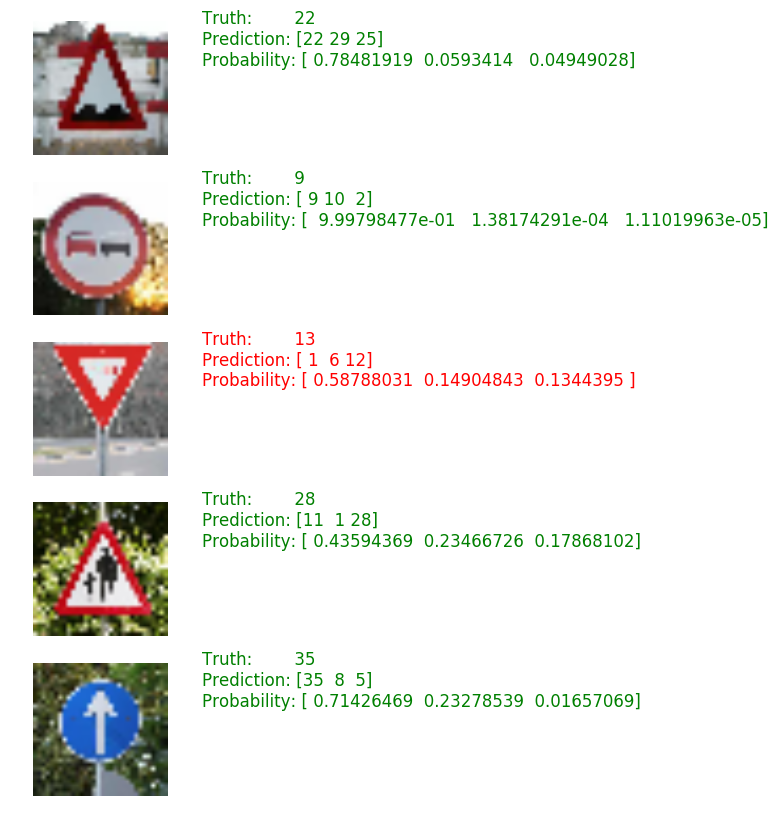

In [174]:
fig = plt.figure(figsize=(10, 10))
for idx in range(0,5):
    truth = img5_labels[idx]
    pred = top_3.indices[idx]
    probs = top_3.values[idx]
    plt.subplot(5, 1,idx+1)
    plt.axis('off')
    color='green' if truth in pred else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}\nProbability: {2} ".format(truth, str(pred), str(probs)), 
             fontsize=12, color=color)
    plt.imshow(images_resized[idx])

For one of the wrong predictions ("Children crossing") they fit in top3.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
session.close()